# El dataset de MNIST

In [1]:
import tensorflow as tf
import random
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(images_train, labels_train), (images_test, labels_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

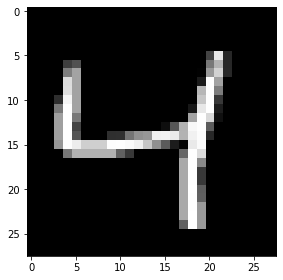

In [4]:
io.imshow(images_train[2])

In [5]:
labels_train[2]

4

# Red Neuronal con TensorFlow v2.1.0
* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial dimensión 784 (28x28)
* El Dataset se puede pensar como 60.000 filas y 784 columnas
* Cada dato del Dataset es un número real entre 0-1 que indica el valor de luz en el pixel

# Hacerlo con Keras

In [6]:
labels_train_encoded = tf.keras.utils.to_categorical(labels_train, num_classes=10)

In [7]:
labels_train[1]

0

In [8]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #Es la función de pérdidas
              metrics=['accuracy'])

In [9]:
model1.fit(images_train, labels_train, epochs=7)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 139us/sample - loss: 2.2966 - accuracy: 0.8529
Epoch 2/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3668 - accuracy: 0.9126
Epoch 3/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2915 - accuracy: 0.9278
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2387 - accuracy: 0.9393
Epoch 5/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2228 - accuracy: 0.9445
Epoch 6/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2037 - accuracy: 0.9492
Epoch 7/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2023 - accuracy: 0.9493
Epoch 8/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1889 - accuracy: 0.9541
Epoch 9/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1889 - accuracy: 0.9545
Epoch

### Evaluar el modelo

In [10]:
test_loss, test_accuracy = model1.evaluate(images_train, labels_train, verbose=2)

60000/60000 - 4s - loss: 0.1789 - accuracy: 0.9556


In [11]:
test_loss, test_accuracy = model1.evaluate(images_test, labels_test, verbose=2)

10000/10000 - 1s - loss: 0.2908 - accuracy: 0.9461


### Matriz de predicciones

In [12]:
predictions = tf.keras.Sequential([model1, 
                                  tf.keras.layers.Softmax()])

In [13]:
predictions_test = predictions.predict(images_test)
predictions_train = predictions.predict(images_train)

### Graficar predicciones Vs. Reales

In [14]:
N = 16
rand_imag_test = random.sample(range(0, len(images_test)), N)
predictions_test = np.argmax(predictions_test, axis=1)

rand_imag_train = random.sample(range(0, len(images_train)), N)
predictions_train = np.argmax(predictions_train, axis=1)

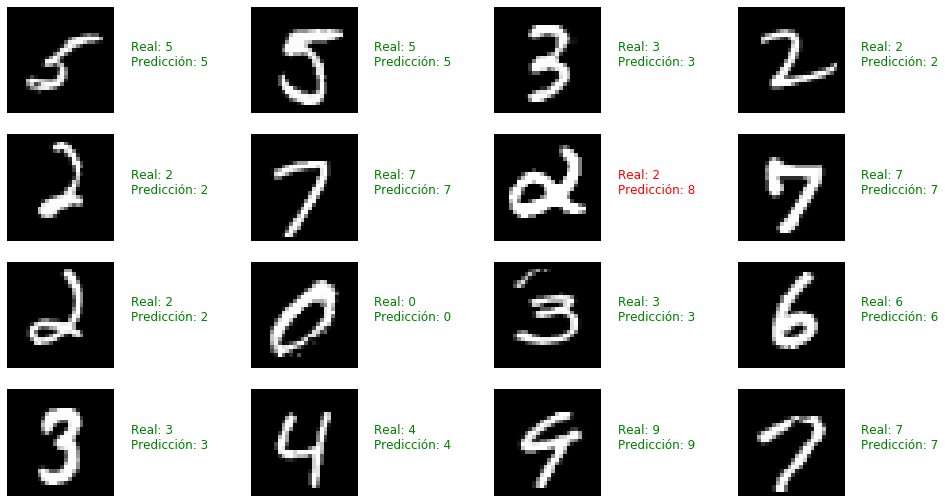

In [15]:
plt.figure(figsize=(16,9))
pos=1

for i in rand_imag_test:
        temp_ = images_test[i]
        val_real = labels_test[i]
        val_predi = predictions_test[i]
        
        plt.subplot(4, 4, pos)
        plt.axis("off")
        plt.imshow(temp_, cmap="gray")
        pos += 1
        
        color_guess = "green" if val_real==val_predi else "red"
        plt.text(32,15, "Real: {0} \nPredicción: {1}".format(val_real, val_predi), fontsize=12, color= color_guess)
        #print("Forma:{0}, min:{1}, max:{2}".format(temp_ima.shape, temp_ima.min(), temp_ima.max()))
        plt.subplots_adjust(wspace=0.5)
plt.show()

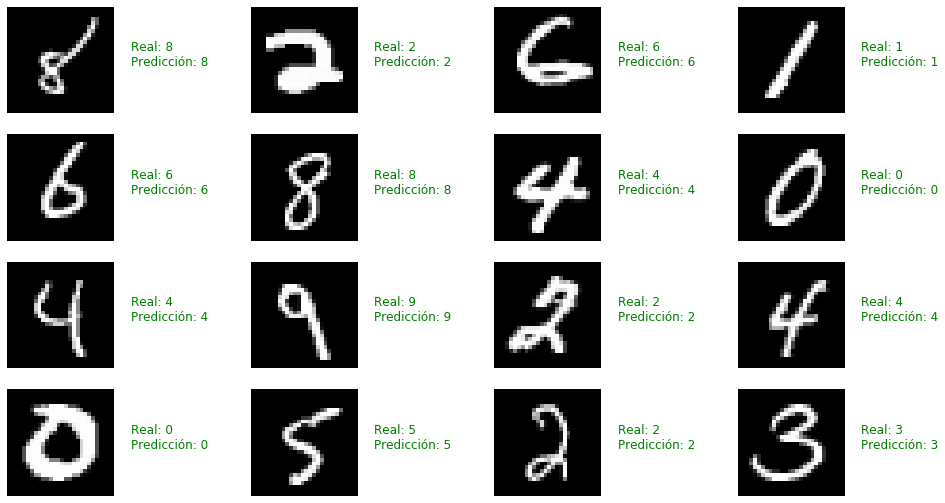

In [16]:
plt.figure(figsize=(16,9))
pos=1

for i in rand_imag_test:
        temp_ = images_train[i]
        val_real = labels_train[i]
        val_predi = predictions_train[i]
        
        plt.subplot(4, 4, pos)
        plt.axis("off")
        plt.imshow(temp_, cmap="gray")
        pos += 1
        
        color_guess = "green" if val_real==val_predi else "red"
        plt.text(32,15, "Real: {0} \nPredicción: {1}".format(val_real, val_predi), fontsize=12, color= color_guess)
        #print("Forma:{0}, min:{1}, max:{2}".format(temp_ima.shape, temp_ima.min(), temp_ima.max()))
        plt.subplots_adjust(wspace=0.5)
plt.show()

In [17]:
match_count = sum([int(predi == real) for predi, real in zip(predictions_train, labels_train)])

acc = match_count / len(labels_train)*100
print("La eficacia de la predicción es del {:0.2f}%".format(acc))

La eficacia de la predicción es del 95.56%


In [18]:
match_count = sum([int(predi == real) for predi, real in zip(predictions_test, labels_test)])

acc = match_count / len(labels_test)*100
print("La eficacia de la predicción es del {:0.2f}%".format(acc))

La eficacia de la predicción es del 94.61%
